In [1]:

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
sns.set(style="whitegrid")


In [ ]:
df = pd.read_csv("Bankloan.csv")
df.head()


,age,ed,employ,address,income,debtinc,creddebt,othdebt,y
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [ ]:
print("Размерность:", df.shape)
print("\nТипы данных:\n", df.dtypes)
print("\nПропуски по столбцам:\n", df.isna().sum())
print("\nЧастоты целевой переменной:\n", df['y'].value_counts(dropna=False))

if 'id' in df.columns:
    df = df.drop('id', axis=1)


Размерность: (1150, 9)

Типы данных:
 age           int64
ed            int64
employ        int64
address       int64
income        int64
debtinc     float64
creddebt    float64
othdebt     float64
y           float64
dtype: object

Пропуски по столбцам:
 age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
y           450
dtype: int64

Частоты целевой переменной:
 y
0.0    517
NaN    450
1.0    183
Name: count, dtype: int64


In [4]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# import numpy as np
# import pandas as pd

# # === Настройки ===
# target_col = 'y'
# RANDOM_STATE = 42

# # === Проверим уникальные значения целевой колонки ===
# print("Уникальные значения в целевой колонке до обработки:")
# print(df[target_col].unique())

# # Приводим целевую к нижнему регистру и удаляем лишние пробелы
# df[target_col] = df[target_col].astype(str).str.strip().str.lower()

# # Заменяем возможные варианты записи на 0/1
# df[target_col] = df[target_col].map({
#     'yes': 1, 'y': 1, '1': 1, 'true': 1,
#     'no': 0, 'n': 0, '0': 0, 'false': 0
# })

# # Удаляем строки, где y не удалось распознать (NaN)
# df = df.dropna(subset=[target_col])

# # Преобразуем в int
# df[target_col] = df[target_col].astype(int)

# print("\nПосле преобразования целевая переменная:")
# print(df[target_col].value_counts())

# # === Определяем числовые и категориальные признаки ===
# numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
# if target_col in numeric_features:
#     numeric_features.remove(target_col)

# categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
# if target_col in categorical_features:
#     categorical_features.remove(target_col)

# print("\nЧисловые признаки:", numeric_features)
# print("Категориальные признаки:", categorical_features)

# # === Преобразователи для разных типов данных ===
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
# ])

# preprocessor = ColumnTransformer(transformers=[
#     ('num', numeric_transformer, numeric_features),
#     ('cat', categorical_transformer, categorical_features)
# ])

# # === Формируем X и y ===
# X = df.drop(target_col, axis=1)
# y = df[target_col].values

# # Проверка, что данных достаточно
# print("\nРазмер данных перед разделением:", X.shape)
# print("Количество классов в y:", np.bincount(y))

# # === Делим на train/test ===
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y if len(np.unique(y)) > 1 else None
# )

# print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


target_col = 'y'
RANDOM_STATE = 42

print("Пропуски в целевой переменной y:", df[target_col].isna().sum())

df = df.dropna(subset=[target_col])

numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
if target_col in numeric_features:
    numeric_features.remove(target_col)

categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
if target_col in categorical_features:
    categorical_features.remove(target_col)

print("Числовые признаки:", numeric_features)
print("Категориальные признаки:", categorical_features)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

X = df.drop(target_col, axis=1)
y = df[target_col].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Пропуски в целевой переменной y: 450
Числовые признаки: ['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']
Категориальные признаки: []
Train shape: (490, 8) Test shape: (210, 8)


In [6]:

clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=RANDOM_STATE))
])


clf_pipeline.fit(X_train, y_train)


y_pred = clf_pipeline.predict(X_test)
y_proba = clf_pipeline.predict_proba(X_test)[:,1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("Базовая модель — метрики на тесте:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")

print("\nКлассический classification_report:\n")
print(classification_report(y_test, y_pred, zero_division=0))


Базовая модель — метрики на тесте:
Accuracy:  0.8143
Precision: 0.6600
Recall:    0.6000
F1-score:  0.6286

Классический classification_report:

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88       155
         1.0       0.66      0.60      0.63        55

    accuracy                           0.81       210
   macro avg       0.76      0.75      0.75       210
weighted avg       0.81      0.81      0.81       210



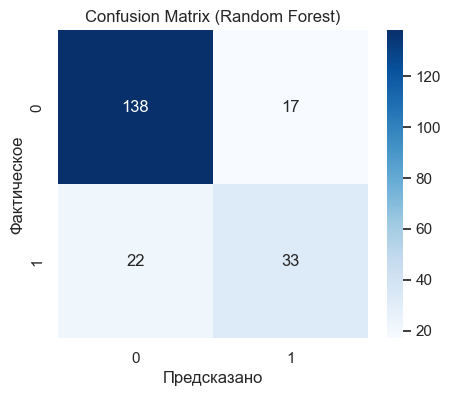

In [7]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Предсказано")
plt.ylabel("Фактическое")
plt.title("Confusion Matrix (Random Forest)")
plt.show()


In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2', None]
}

grid = GridSearchCV(
    clf_pipeline, 
    param_grid, 
    cv=3, 
    scoring='roc_auc',   
    n_jobs=-1, 
    verbose=1
)

grid.fit(X_train, y_train)

print("Лучшие параметры GridSearchCV:\n", grid.best_params_)
print("\nЛучший ROC AUC (cv):", grid.best_score_)


Fitting 3 folds for each of 324 candidates, totalling 972 fits
Лучшие параметры GridSearchCV:
 {'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}

Лучший ROC AUC (cv): 0.794441584372874


In [9]:
# Блок 8: модель с лучшими параметрами
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

acc_b = accuracy_score(y_test, y_pred_best)
prec_b = precision_score(y_test, y_pred_best, zero_division=0)
rec_b = recall_score(y_test, y_pred_best, zero_division=0)
f1_b = f1_score(y_test, y_pred_best, zero_division=0)

print("Модель после подбора — метрики на тесте:")
print(f"Accuracy:  {acc_b:.4f}")
print(f"Precision: {prec_b:.4f}")
print(f"Recall:    {rec_b:.4f}")
print(f"F1-score:  {f1_b:.4f}")

print("\nClassification report (best):\n")
print(classification_report(y_test, y_pred_best, zero_division=0))


Модель после подбора — метрики на тесте:
Accuracy:  0.8190
Precision: 0.6735
Recall:    0.6000
F1-score:  0.6346

Classification report (best):

              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       155
         1.0       0.67      0.60      0.63        55

    accuracy                           0.82       210
   macro avg       0.77      0.75      0.76       210
weighted avg       0.81      0.82      0.82       210



    feature  importance
5   debtinc    0.219078
2    employ    0.161345
6  creddebt    0.142193
7   othdebt    0.131189
0       age    0.111057
4    income    0.104194
3   address    0.100198
1        ed    0.030746


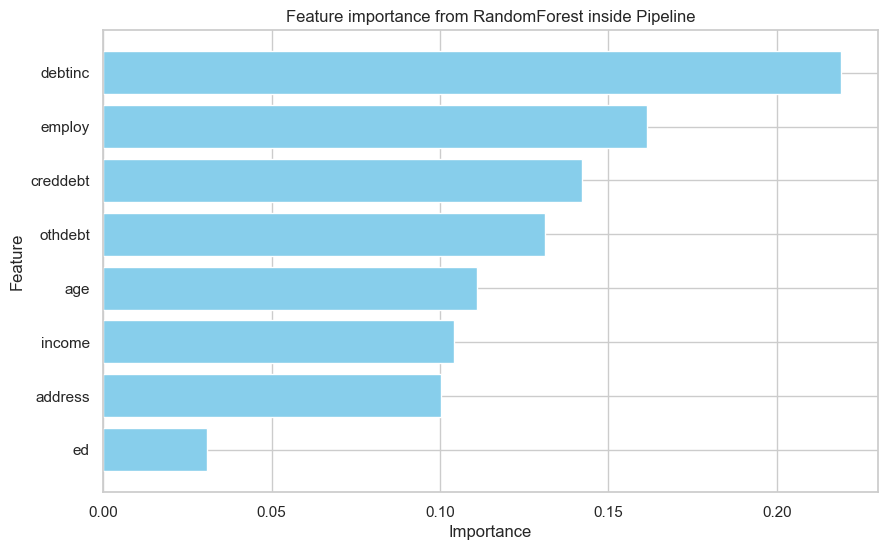

In [ ]:

best_rf = best_model.named_steps['classifier']


importances = best_rf.feature_importances_

import pandas as pd
import matplotlib.pyplot as plt

feature_importance_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature importance from RandomForest inside Pipeline")
plt.show()


Permutation importance для всех признаков:
    feature  importance_mean  importance_std
2    employ         0.092381        0.014553
5   debtinc         0.079286        0.019879
6  creddebt         0.038810        0.011594
3   address         0.022143        0.011296
0       age         0.011905        0.010911
4    income         0.007857        0.007265
1        ed         0.005952        0.005808
7   othdebt         0.003333        0.012697


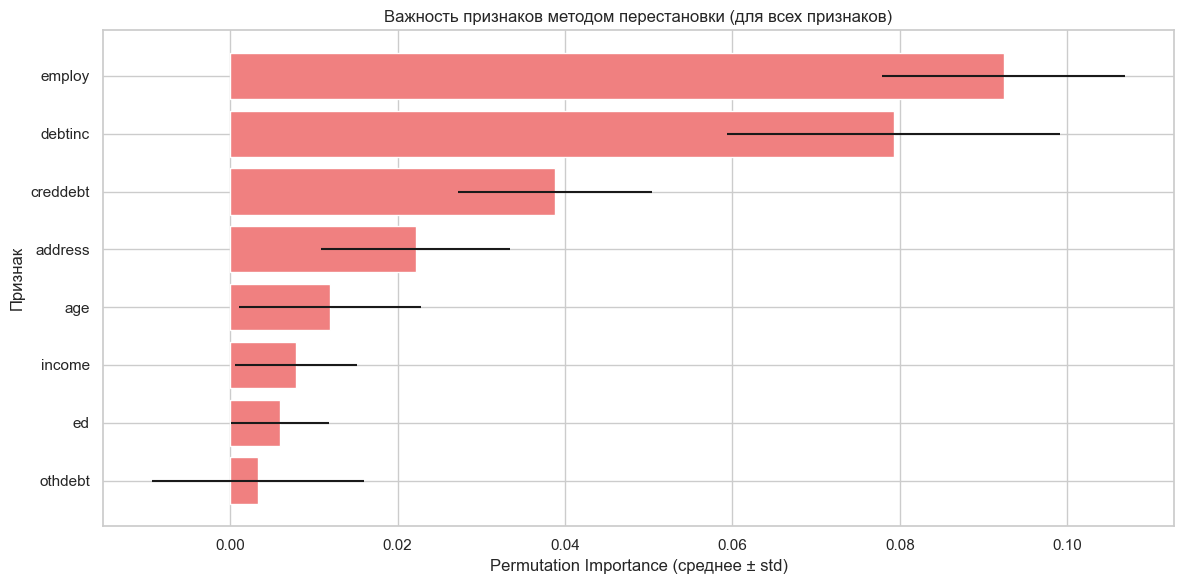

In [11]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

perm_importance = permutation_importance(
    best_model, X_test, y_test,
    n_repeats=20,          #
    random_state=42,
    scoring='accuracy'
)

perm_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values(by='importance_mean', ascending=False)

print("Permutation importance для всех признаков:")
print(perm_df)

plt.figure(figsize=(12, max(6, 0.3*len(perm_df)))) 
plt.barh(perm_df['feature'], perm_df['importance_mean'], xerr=perm_df['importance_std'], color='lightcoral')
plt.gca().invert_yaxis() 
plt.xlabel("Permutation Importance (среднее ± std)")
plt.ylabel("Признак")
plt.title("Важность признаков методом перестановки (для всех признаков)")
plt.tight_layout()
plt.show()
